In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('Relatorios/evento_adverso.xlsx')
df['VACINA'].unique()

array(['Astrazeneca', 'Pfizer', 'Butantan', 'Janssen'], dtype=object)

In [11]:
df_vacina_gng_count = df[['NUMERO DA NOTIFICACAO' ,'VACINA', 'CLASSIFICACAO DE GRAVIDADE', 'REACAO / EVENTO ADVERSO']]

In [12]:
df_vacina_gng_count.shape

(30258, 4)

In [13]:
df_vacina_gng_count = df_vacina_gng_count.drop_duplicates(keep='first')

In [14]:
#df_vacina_gng_count['COUNT'] = 1
df_vacina_gng_count = df_vacina_gng_count.groupby(by=['VACINA', 'CLASSIFICACAO DE GRAVIDADE', 'REACAO / EVENTO ADVERSO']).count().reset_index()

# Atrazeneca

In [15]:
# Total de vacinas aplicadas astrazeneca
aplicadas_astra = 7212614

In [16]:
## GRAVE ##
df_astra_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Astrazeneca') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_astra_graves = df_astra_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_astra_graves['INCIDENCIA_POR_1000ds'] = (df_astra_graves['COUNT']/aplicadas_astra*100000).round(2)
df_astra_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
93,Astrazeneca,Grave,Febre,10,0.14
25,Astrazeneca,Grave,Cefaleia,8,0.11
53,Astrazeneca,Grave,Dispneia,7,0.10
120,Astrazeneca,Grave,Mialgia,6,0.08
111,Astrazeneca,Grave,Infarto agudo do miocardio,6,0.08
125,Astrazeneca,Grave,Morte,5,0.07
177,Astrazeneca,Grave,Sindrome de Guillain-Barre,5,0.07
2,Astrazeneca,Grave,AVC,5,0.07
208,Astrazeneca,Grave,Vomito,5,0.07
5,Astrazeneca,Grave,Acidente vascular cerebral,4,0.06


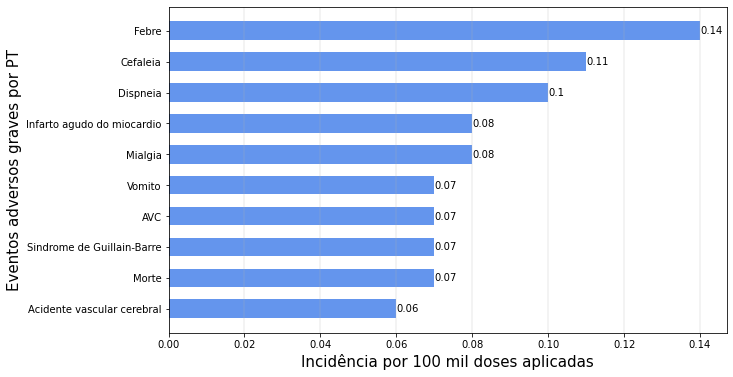

In [17]:
# GRÁFICO
#deixando em ordem decrescente
df_astra_graves = df_astra_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_astra_graves['REACAO / EVENTO ADVERSO'], df_astra_graves['INCIDENCIA_POR_1000ds'], largura, color='cornflowerblue')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_astra_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5b.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

In [18]:
## NÃO GRAVE ##
df_astra_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Astrazeneca') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_astra_nao_graves = df_astra_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_astra_nao_graves['INCIDENCIA_POR_1000ds'] = (df_astra_nao_graves['COUNT']/aplicadas_astra*1000).round(2)
df_astra_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
625,Astrazeneca,Não grave,Febre,2566,0.36
289,Astrazeneca,Não grave,Cefaleia,2427,0.34
761,Astrazeneca,Não grave,Mialgia,2401,0.33
275,Astrazeneca,Não grave,Calafrios,1002,0.14
770,Astrazeneca,Não grave,Nausea,783,0.11
425,Astrazeneca,Não grave,Dor de cabeca,707,0.10
380,Astrazeneca,Não grave,Diarreia,513,0.07
619,Astrazeneca,Não grave,Fadiga,415,0.06
442,Astrazeneca,Não grave,Dor localizada,385,0.05
997,Astrazeneca,Não grave,Tontura,321,0.04


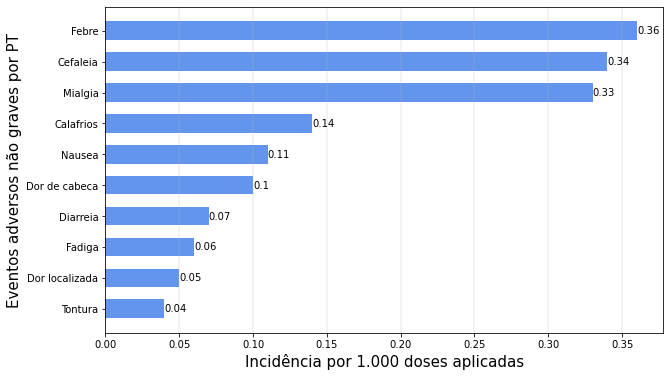

In [19]:
# GRÁFICO
#deixando em ordem decrescente
df_astra_nao_graves = df_astra_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_astra_nao_graves['REACAO / EVENTO ADVERSO'], df_astra_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='cornflowerblue')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_astra_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4b.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

# Pfizer

In [20]:
# Total de vacinas aplicadas pfizer
aplicadas_pfizer = 6175263

In [21]:
## GRAVE ##
df_pfizer_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Pfizer') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_pfizer_graves = df_pfizer_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_pfizer_graves['INCIDENCIA_POR_1000ds'] = (df_pfizer_graves['COUNT']/aplicadas_pfizer*100000).round(2)
df_pfizer_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1882,Pfizer,Grave,Cefaleia,6,0.10
1877,Pfizer,Grave,Aborto,4,0.06
1907,Pfizer,Grave,Febre,3,0.05
1947,Pfizer,Grave,Trombose na perna,2,0.03
1939,Pfizer,Grave,SARA,2,0.03
1925,Pfizer,Grave,Parada cardiaca,2,0.03
1924,Pfizer,Grave,Nausea,2,0.03
1952,Pfizer,Grave,Vomito,2,0.03
1933,Pfizer,Grave,Pneumonia,2,0.03
1921,Pfizer,Grave,Miosite,1,0.02


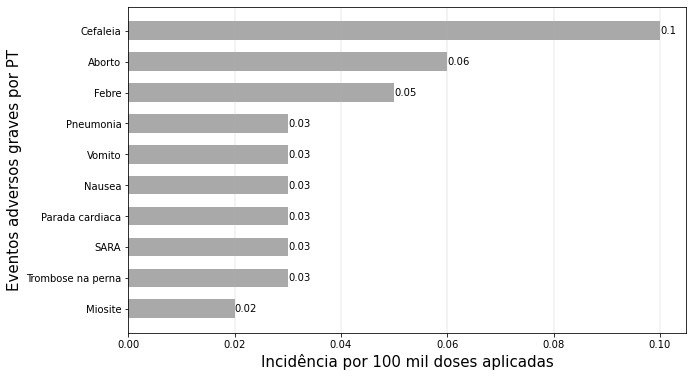

In [22]:
# GRÁFICO
#deixando em ordem decrescente
df_pfizer_graves = df_pfizer_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_pfizer_graves['REACAO / EVENTO ADVERSO'], df_pfizer_graves['INCIDENCIA_POR_1000ds'], largura, color='darkgray')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_pfizer_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5c.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

In [23]:
## NÃO GRAVE ##
df_pfizer_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Pfizer') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_pfizer_nao_graves = df_pfizer_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_pfizer_nao_graves['INCIDENCIA_POR_1000ds'] = (df_pfizer_nao_graves['COUNT']/aplicadas_pfizer*1000).round(2)
df_pfizer_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1996,Pfizer,Não grave,Cefaleia,336,0.05
2218,Pfizer,Não grave,Mialgia,306,0.05
2151,Pfizer,Não grave,Febre,284,0.05
2055,Pfizer,Não grave,Dor de cabeca,114,0.02
2332,Pfizer,Não grave,Tosse,104,0.02
2082,Pfizer,Não grave,Dor no local de aplicacao,97,0.02
2224,Pfizer,Não grave,Nausea,87,0.01
1985,Pfizer,Não grave,Calafrios,86,0.01
2024,Pfizer,Não grave,Diarreia,85,0.01
2014,Pfizer,Não grave,Coriza,83,0.01


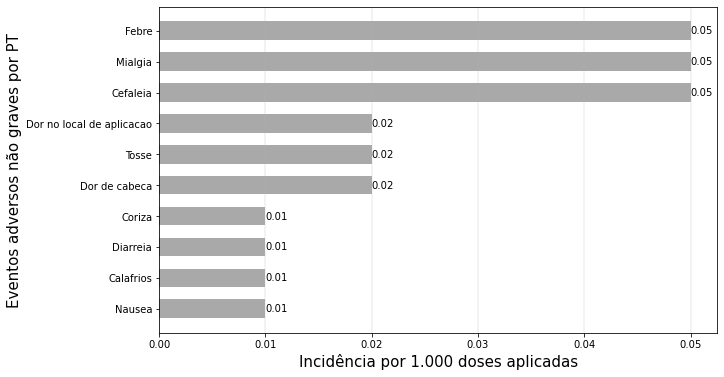

In [24]:
# GRÁFICO
#deixando em ordem decrescente
df_pfizer_nao_graves = df_pfizer_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_pfizer_nao_graves['REACAO / EVENTO ADVERSO'], df_pfizer_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='darkgray')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_pfizer_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4c.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

# Coronavac / Butantan

In [25]:
# Total de vacinas aplicadas coronavac/butantan
aplicadas_coronavac = 4464908

In [26]:
## GRAVE ##
df_coronavac_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_coronavac_graves = df_coronavac_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_coronavac_graves['INCIDENCIA_POR_1000ds'] = (df_coronavac_graves['COUNT']/aplicadas_coronavac*100000).round(2)
df_coronavac_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1166,Butantan,Grave,Morte,44,0.99
1106,Butantan,Grave,Dispneia,19,0.43
1154,Butantan,Grave,Infarto agudo do miocardio,10,0.22
1067,Butantan,Grave,AVC,8,0.18
1140,Butantan,Grave,Febre,8,0.18
1215,Butantan,Grave,Vomito,7,0.16
1176,Butantan,Grave,Paralisia facial,6,0.13
1151,Butantan,Grave,Hipotensao,5,0.11
1212,Butantan,Grave,Tosse,5,0.11
1167,Butantan,Grave,Nausea,4,0.09


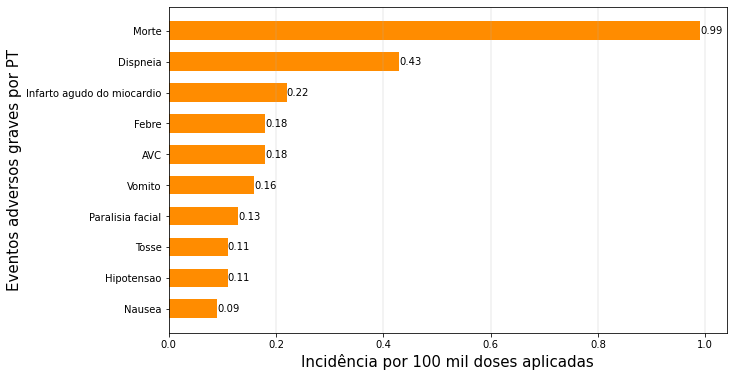

In [27]:
# GRÁFICO
#deixando em ordem decrescente
df_coronavac_graves = df_coronavac_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_coronavac_graves['REACAO / EVENTO ADVERSO'], df_coronavac_graves['INCIDENCIA_POR_1000ds'], largura, color='darkorange')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_coronavac_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5a.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

In [28]:
## NÃO GRAVE ##
df_coronavac_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_coronavac_nao_graves = df_coronavac_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_coronavac_nao_graves['INCIDENCIA_POR_1000ds'] = (df_coronavac_nao_graves['COUNT']/aplicadas_coronavac*1000).round(2)
df_coronavac_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1264,Butantan,Não grave,Cefaleia,609,0.14
1556,Butantan,Não grave,Mialgia,390,0.09
1307,Butantan,Não grave,Diarreia,348,0.08
1460,Butantan,Não grave,Febre,276,0.06
1345,Butantan,Não grave,Dor de garganta,225,0.05
1703,Butantan,Não grave,Tosse,217,0.05
1295,Butantan,Não grave,Coriza,179,0.04
1564,Butantan,Não grave,Nausea,163,0.04
1343,Butantan,Não grave,Dor de cabeca,140,0.03
1456,Butantan,Não grave,Fadiga,135,0.03


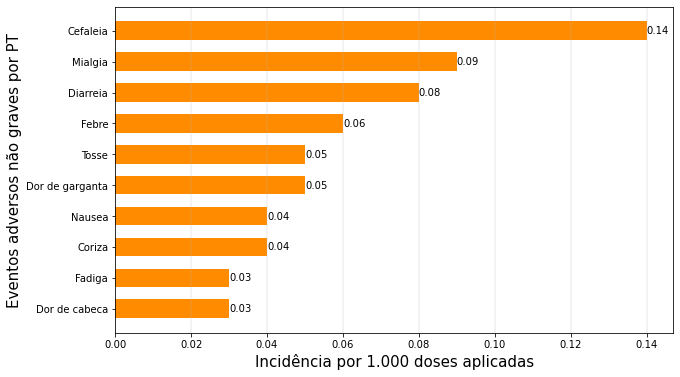

In [29]:
# GRÁFICO
#deixando em ordem decrescente
df_coronavac_nao_graves = df_coronavac_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_coronavac_nao_graves['REACAO / EVENTO ADVERSO'], df_coronavac_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='darkorange')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_coronavac_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4a.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

# Janssen

In [30]:
# Total de vacinas aplicadas janssen
aplicadas_janssen = 304444

In [31]:
## GRAVE ##
df_janssen_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Janssen') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_janssen_graves = df_janssen_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_janssen_graves['INCIDENCIA_POR_1000ds'] = (df_janssen_graves['COUNT']/aplicadas_janssen*100000).round(2)
df_janssen_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1740,Janssen,Grave,Cefaleia,2,0.66
1739,Janssen,Grave,Alteracoes neurologicas,1,0.33
1741,Janssen,Grave,Convulsao,1,0.33
1742,Janssen,Grave,Disartria,1,0.33
1743,Janssen,Grave,Disfagia,1,0.33
1744,Janssen,Grave,Encefalomielite disseminada aguda,1,0.33
1745,Janssen,Grave,Febre,1,0.33
1746,Janssen,Grave,Hemiplegia,1,0.33
1747,Janssen,Grave,Mialgia,1,0.33
1748,Janssen,Grave,Parada cardiopulmonar,1,0.33


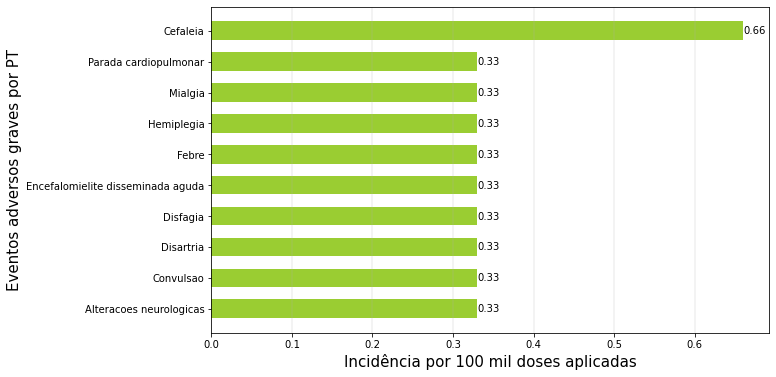

In [32]:
# GRÁFICO
#deixando em ordem decrescente
df_janssen_graves = df_janssen_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_janssen_graves['REACAO / EVENTO ADVERSO'], df_janssen_graves['INCIDENCIA_POR_1000ds'], largura, color='yellowgreen')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_janssen_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 5d.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()

In [33]:
## NÃO GRAVE ##
df_janssen_nao_graves = df_vacina_gng_count[((df_vacina_gng_count['VACINA'] == 'Butantan') & (df_vacina_gng_count['CLASSIFICACAO DE GRAVIDADE'].str.contains('Não grave')))].sort_values(by=['NUMERO DA NOTIFICACAO'], ascending=False).head(10)
df_janssen_nao_graves = df_janssen_nao_graves.rename(columns={'NUMERO DA NOTIFICACAO': 'COUNT'})
df_janssen_nao_graves['INCIDENCIA_POR_1000ds'] = (df_janssen_nao_graves['COUNT']/aplicadas_janssen*1000).round(2)
df_janssen_nao_graves

,VACINA,CLASSIFICACAO DE GRAVIDADE,REACAO / EVENTO ADVERSO,COUNT,INCIDENCIA_POR_1000ds
1264,Butantan,Não grave,Cefaleia,609,2.00
1556,Butantan,Não grave,Mialgia,390,1.28
1307,Butantan,Não grave,Diarreia,348,1.14
1460,Butantan,Não grave,Febre,276,0.91
1345,Butantan,Não grave,Dor de garganta,225,0.74
1703,Butantan,Não grave,Tosse,217,0.71
1295,Butantan,Não grave,Coriza,179,0.59
1564,Butantan,Não grave,Nausea,163,0.54
1343,Butantan,Não grave,Dor de cabeca,140,0.46
1456,Butantan,Não grave,Fadiga,135,0.44


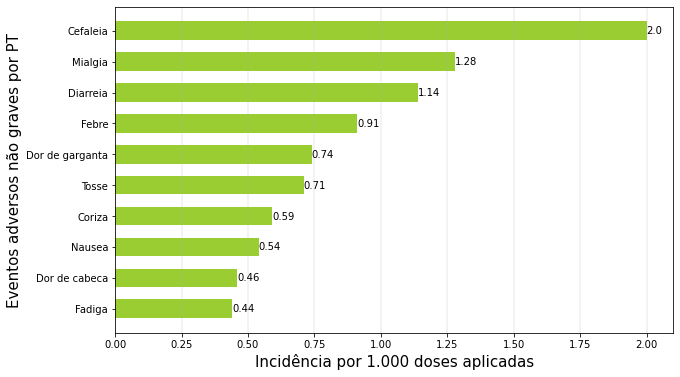

In [34]:
# GRÁFICO
#deixando em ordem decrescente
df_janssen_nao_graves = df_janssen_nao_graves.sort_values(by='INCIDENCIA_POR_1000ds')

plt.figure(figsize=(10, 6))
largura = 0.6

ax = plt.barh(df_janssen_nao_graves['REACAO / EVENTO ADVERSO'], df_janssen_nao_graves['INCIDENCIA_POR_1000ds'], largura, color='yellowgreen')
plt.xlabel('Incidência por 1.000 doses aplicadas',fontsize=15)
plt.ylabel('Eventos adversos não graves por PT',fontsize=15)
plt.grid(axis='x', linewidth=0.3)

#colocar valores na barra
for index, value in enumerate(df_janssen_nao_graves['INCIDENCIA_POR_1000ds']): 
    plt.text(value, index, 
             str(value), va='center') 

plt.savefig('Graficos/Figura 4d.png', dpi=(600), bbox_inches='tight', transparent=True)
plt.show()